Basic chatbot usign the Graphapi

In [40]:
from langgraph.graph import StateGraph, START, END

from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import  add_messages 

In [41]:
class state(TypedDict):

    #add_messages is a function that adds messages to the state
    #it takes a list of messages and adds them to the state
    #it returns a list of messages

    messages: Annotated[list, add_messages]
graph_builder = StateGraph(state)






In [42]:
graph_builder

In [43]:
import os
from dotenv import load_dotenv

load_dotenv()





True

In [44]:
from  langchain_groq import ChatGroq
from langchain.chat_models import  init_chat_model

In [45]:
llm = ChatGroq(model_name="llama-3.1-8b-instant")

In [46]:
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x7152aec06960>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7152aedeed50>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [47]:
def chatbot(state: state):
    return {"messages": [llm.invoke(state["messages"])]}







In [48]:
#add the chatbot node to the graph
graph_builder.add_node("chatbot", chatbot)
#add the chatbot node to the graph
graph_builder.add_edge(START, "chatbot")
#add the end node to the graph
graph_builder.add_edge("chatbot", END)



#compile the graph
graph = graph_builder.compile()

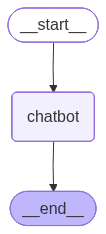

In [49]:
#visulize the graph
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))






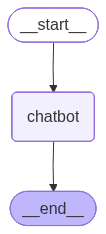

In [50]:
# Visualize the graph
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
from langchain_core.messages import HumanMessage

graph.invoke({"messages": [HumanMessage(content="Hello, how are you?")]})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='c6157ddd-a803-47a9-96f8-b20aeb5ce290'),
  AIMessage(content="I'm just a language model, so I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 41, 'total_tokens': 88, 'completion_time': 0.051734691, 'completion_tokens_details': None, 'prompt_time': 0.001927635, 'prompt_tokens_details': None, 'queue_time': 0.089200415, 'total_time': 0.053662326}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c49ae-662d-7481-a383-ac95191f8e96-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 4

In [52]:
graph.invoke({"messages":"Hello, how are you?"})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='292d6fc6-e46f-4b6b-aa0e-1d6b6a64421f'),
  AIMessage(content="I'm functioning properly, thank you for asking. I'm a large language model, so I don't have feelings in the way humans do, but I'm here to help you with any questions or tasks you have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 41, 'total_tokens': 93, 'completion_time': 0.062141659, 'completion_tokens_details': None, 'prompt_time': 0.002520136, 'prompt_tokens_details': None, 'queue_time': 0.089478265, 'total_time': 0.064661795}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c49ae-67cd-7a10-b7d7-79d2c9f26ec9-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_to

In [53]:
from langchain_core.messages import HumanMessage

response = graph.invoke({"messages": [HumanMessage(content="Hello, how are you?")]})
response

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='652c86a4-8731-49ea-a2e0-30641510a35f'),
  AIMessage(content="I'm functioning properly. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 41, 'total_tokens': 54, 'completion_time': 0.022705257, 'completion_tokens_details': None, 'prompt_time': 0.002037689, 'prompt_tokens_details': None, 'queue_time': 0.091596953, 'total_time': 0.024742946}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c49ae-690b-7f31-9b7b-fa6953b3ac5b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 13, 'total_tokens': 54})]}

In [54]:
response["messages"][-1].content







"I'm functioning properly. How can I assist you today?"

In [55]:
from multiprocessing import Value


for event in  graph.stream({"messages": "Hello, how are you?"}):
    for event in event.values():
        print(event["messages"][-1].content)

I'm functioning properly, thank you for asking. I'm a large language model, so I don't have feelings like humans do, but I'm here to help with any questions or tasks you have. How can I assist you today?


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_tavily import TavilySearchResults
from langchain_core.tools import tool

# Tavily is a search tool, not a chat model
search = TavilySearchResults(
    api_key=os.getenv("TAVILY_API_KEY"),  # Tavily uses TAVILY_API_KEY
    max_results=3,
)
# Use `search` as a tool in your agent/graph

ImportError: cannot import name 'TavilySearchResults' from 'langchain_tavily' (/home/veera/Personal /Langraph/.venv/lib/python3.12/site-packages/langchain_tavily/__init__.py)